In [27]:
import numpy as np
import matplotlib.pyplot as plt

def one(x):
    return np.ones_like(x)

def avg(x):
    return (one(x).T @ (x / len(x))).item()

def ssq(x):
    return x.T @ x

def l2(x):
    return (x.T @ x) ** (1/2)

def rms(x):
    return l2(x) / np.sqrt(len(x))

def std(x):
    return rms(x - avg(x) * one(x)).item()

def equal(x, y):
    return np.allclose(x, y)

n = 5
a = np.array(np.random.randn(5))[:, np.newaxis]
b = np.array(np.random.randn(5))[:, np.newaxis]

In [28]:
equal(np.inner(a.T, a.T), a.T @ a)

True

In [29]:
equal(a.T @ a, one(a).T @ (a**2))

True

In [30]:
equal(l2(a), np.linalg.norm(a))

True

In [31]:
equal(rms(a), np.sqrt((one(a).T @ a**2) / len(a)))

True

### rms(x)^2 = avg(x)^2 + std(x)^2

In [32]:
equal(rms(a)**2, avg(a)**2 + std(a)**2)

True

### Triangle ineq

In [33]:
assert l2(a + b) <= l2(a) + l2(b)

In [97]:
t = np.arange(0, 1.01, 0.01)[:, np.newaxis]
x = (np.cos(8*t) - 2 * np.sin(11*t))

In [101]:
rms(x)

array([[1.08375564]])

In [102]:
np.std(x)

np.float64(1.0829208369255867)

In [103]:
equal(avg(x)**2 + std(x)**2, rms(x)**2)

True

In [ ]:
# rms^2 = avg^2 + std^2 

In [104]:
equal(rms(x), std(x))

False

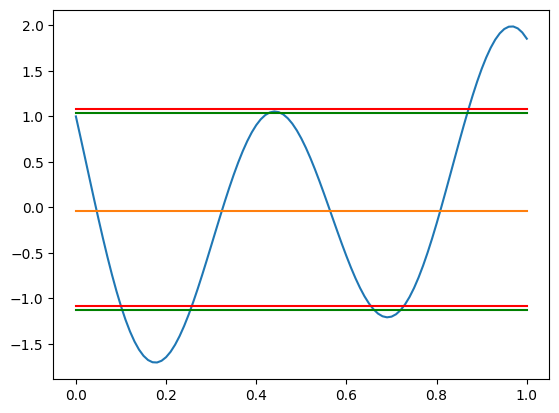

In [105]:
plt.ion()
plt.plot(t, x)
plt.plot(t, (avg(x) + rms(x))*one(x), 'g')
plt.plot(t, std(x)*one(x), 'r')
plt.plot(t, avg(x)*one(x))
plt.plot(t, (avg(x) - rms(x))*one(x), 'g')
plt.plot(t, -std(x)*one(x), 'r')

### Chebyshev inequality
- number of entries of an n-vector x that have abs value at least a is no more than ||x||^2/a^2
- num of entries is integer we floor for ||x||^2/a

In [114]:
import math
a = 1.5

In [115]:
cheb_bound = lambda x, a: math.floor(((x.T @ x)/a).item())

In [116]:
cheb_bound(x, a)

79

In [119]:
(abs(x) > a).sum()

np.int64(20)